**PROBLEM 1: Aminer : basic dataset analysis**

In [50]:
!wget -O dataset.zip 'https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip'

--2025-01-20 22:35:02--  https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip
Resolving lfs.aminer.cn (lfs.aminer.cn)... 159.27.2.14
Connecting to lfs.aminer.cn (lfs.aminer.cn)|159.27.2.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Could not parse String-Transport-Security header
Length: 686542584 (655M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 654.74M  7.34MB/s    in 2m 32s  

2025-01-20 22:37:35 (4.31 MB/s) - ‘dataset.zip’ saved [686542584/686542584]



In [51]:
!unzip dataset.zip -d /content/dataset

Archive:  dataset.zip
replace /content/dataset/acm.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**A. Compute the number of distinct authors, publication venues, publications, and citations/references.**

In [52]:
import pandas as pd

# Path to the dataset file
file_path = '/content/dataset/acm.txt'

# Lists to store parsed data
titles = []
authors = []
years = []
venues = []
indices = []
references = []

# Open and parse the file line by line
with open(file_path, 'r') as file:
    record = {'references': []}
    for line in file:
        line = line.strip()
        if line.startswith("#*"):
            record['title'] = line[2:]
        elif line.startswith("#@"):
            record['authors'] = line[2:]
        elif line.startswith("#t"):
            record['year'] = line[2:]
        elif line.startswith("#c"):
            record['venue'] = line[2:]
        elif line.startswith("#index"):
            record['index'] = line[6:]
        elif line.startswith("#%"):
            reference = line[2:].strip()
            if reference:
                record['references'].append(reference)
        elif line == "":
            if record:
                titles.append(record.get('title', ''))
                authors.append(record.get('authors', ''))
                years.append(record.get('year', ''))
                venues.append(record.get('venue', ''))
                indices.append(record.get('index', ''))
                references.append(record.get('references', []))
                record = {'references': []}

# Create a DataFrame from the lists
df = pd.DataFrame({
    'title': titles,
    'authors': authors,
    'year': years,
    'venue': venues,
    'index': indices,
    'references': references
})

In [53]:
df.head()

title  \
0  MOSFET table look-up models for circuit simula...   
1  The verification of the protection mechanisms ...   
2  Another view of functional and multivalued dep...   
3     Entity-relationship diagrams which are in BCNF   
4                          The computer comes of age   

                                             authors  year  \
0                                                     1984   
1                                   Virgil D. Gligor  1984   
2                           M. Gyssens, J. Paredaens  1984   
3  Sushil Jajodia, Peter A. Ng, Frederick N. Spri...  1984   
4                                        Rene Moreau  1984   

                                           venue index references  
0                  Integration, the VLSI Journal     1         []  
1  International Journal of Parallel Programming     2         []  
2  International Journal of Parallel Programming     3         []  
3  International Journal of Parallel Programming     4         []  
4                      The computer comes of age     5         []

In [54]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [55]:
# Number of distinct authors
authors_set = set()
df['authors'].str.split(',').dropna().apply(authors_set.update)
num_authors = len(authors_set)
print(f"Number of distinct authors: {num_authors}")

# Number of distinct venues
num_venues = df['venue'].nunique()
print(f"Number of distinct venues: {num_venues}")

# Number of distinct publications (based on unique titles)
num_publications = df['title'].nunique()
print(f"Number of distinct publications: {num_publications}")

Number of distinct authors: 2027009
Number of distinct venues: 273330
Number of distinct publications: 2183552


**B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?**


In [56]:
# Filter the dataset
conference_name = "Principles and Practice of Knowledge Discovery in Databases"

# Using case-insensitive matching
ppkdd_venues = df[df['venue'].str.contains(conference_name, case=False, na=False)]

unique_ppkdd_venues = ppkdd_venues['venue'].unique()

print("Unique venue names associated with 'Principles and Practice of Knowledge Discovery in Databases':\n")
for venue in unique_ppkdd_venues:
    print(venue)

# Count the number of occurrences for each venue name
venue_counts = ppkdd_venues['venue'].value_counts()

print("\nCounts of publications per venue name:\n")
print(venue_counts)

Unique venue names associated with 'Principles and Practice of Knowledge Discovery in Databases':

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Counts of publications per venue name:

venue
PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery 

It appears as though we have some inconsistent vanue naming conventions, some of our years are abbreviated like PKDD '04 and PKDD 2007.

We also have an inflated count of unique venues. This is because each variation is counted as a distinct venue, causing the inflation.


**C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)**

In [57]:
# Create a dictionary to store publications for each author
author_publications = defaultdict(list)

# Populate the dictionary
for _, row in df.iterrows():
    # Split authors by comma and strip whitespace, filter out empty strings
    authors = [author.strip() for author in row['authors'].split(',') if author.strip()]
    title = row['title']
    for author in authors:
        author_publications[author].append(title)

print("Sample of authors and their publication counts (after cleaning):")
for author, publications in list(author_publications.items())[:15]:
    print(f"Author: {author}, Number of Publications: {len(publications)}")

Sample of authors and their publication counts (after cleaning):
Author: Virgil D. Gligor, Number of Publications: 68
Author: M. Gyssens, Number of Publications: 7
Author: J. Paredaens, Number of Publications: 18
Author: Sushil Jajodia, Number of Publications: 418
Author: Peter A. Ng, Number of Publications: 36
Author: Frederick N. Springsteel, Number of Publications: 8
Author: Rene Moreau, Number of Publications: 1
Author: A. G. Akritas, Number of Publications: 4
Author: S. S. Lyengar, Number of Publications: 2
Author: A. A. Rampuria, Number of Publications: 1
Author: C. C. Chang, Number of Publications: 56
Author: M. W. Du, Number of Publications: 9
Author: R. C. T. Lee, Number of Publications: 59
Author: David Haussler, Number of Publications: 102
Author: Hans Röck, Number of Publications: 2


In [58]:
# List of publication counts for each author
publication_counts = [len(publications) for publications in author_publications.values()]

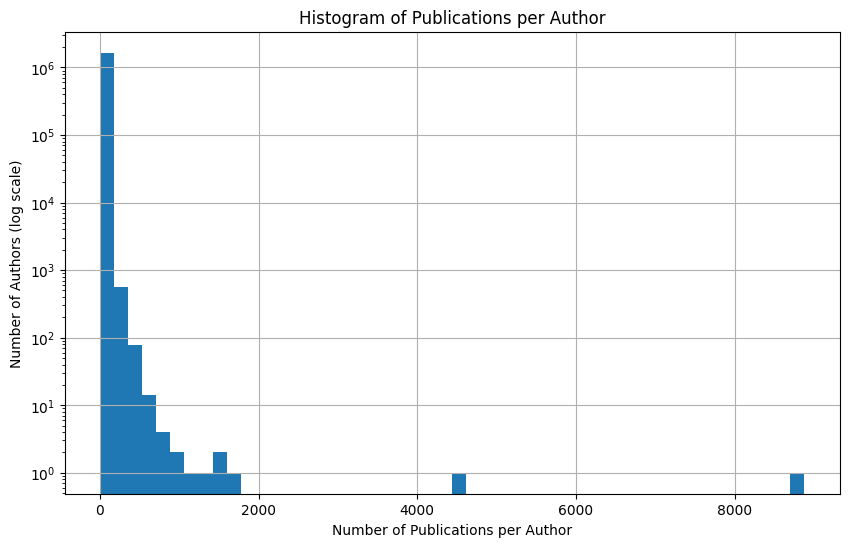

In [59]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(publication_counts, bins=50, log=True)
plt.xlabel('Number of Publications per Author')
plt.ylabel('Number of Authors (log scale)')
plt.title('Histogram of Publications per Author')
plt.grid(True)
plt.show()

**D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.**

In [60]:
import numpy as np

# Calculate statistics
mean_publications = np.mean(publication_counts)
std_dev_publications = np.std(publication_counts)
q1 = np.percentile(publication_counts, 25)  # 1st quartile (25th percentile)
median_publications = np.median(publication_counts)  # 2nd quartile (50th percentile)
q3 = np.percentile(publication_counts, 75)  # 3rd quartile (75th percentile)

# Print results
print(f"Mean number of publications per author: {mean_publications:.2f}")
print(f"Standard deviation: {std_dev_publications:.2f}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median_publications}")
print(f"3rd Quartile (Q3): {q3}")

Mean number of publications per author: 3.46
Standard deviation: 12.77
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 3.0


The mean represents the average number of publications per author. While the median represents the middle value when the number of publications is sorted.

Interpreting this information lets us know that:
The mean 3.46 is slightly higher than our median of 1.0, this indicates a right-skewed distribution. This means that most authors have very few publications, a small number of authors have significantly more publications, raising our mean.

With our standard deviation of 12.77 being much larger than the mean, this shows us that there is a high variability in the number of publications per author. This reinforces the claim above that a small amount of authors disproportionally dominates the high publication counts.

Quartiles:
Q1 - 25% of authors only have 1 publication or lower.
Median Q2 - 50% of authors have 1 publication of lower.
Q3 - 75% of authors have 3 publications or fewer.
Interquartile range = Q3 - Q1 = 3.0 - 1.0 - 2.0. Shows us that the majority of authors have publication counts in a lower range (1-3 publications).



**E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?**

In [61]:
# Calculate the number of publications per venue
venue_publication_counts = df['venue'].value_counts()

# Display the venue with the largest number of publications
most_popular_venue = venue_publication_counts.idxmax()
most_publications = venue_publication_counts.max()

print(f"Venue with the largest number of publications: {most_popular_venue}")
print(f"Number of publications in {most_popular_venue}: {most_publications}")

Venue with the largest number of publications: IEEE Transactions on Information Theory
Number of publications in IEEE Transactions on Information Theory: 12754


In [62]:
import numpy as np

# Convert counts to a list
venue_counts = venue_publication_counts.values

# Calculate statistics
mean_venue_publications = np.mean(venue_counts)
std_dev_venue_publications = np.std(venue_counts)
median_venue_publications = np.median(venue_counts)
q1_venue_publications = np.percentile(venue_counts, 25)
q3_venue_publications = np.percentile(venue_counts, 75)

# Print results
print(f"Mean number of publications per venue: {mean_venue_publications:.2f}")
print(f"Standard deviation: {std_dev_venue_publications:.2f}")
print(f"1st Quartile (Q1): {q1_venue_publications}")
print(f"Median (Q2): {median_venue_publications}")
print(f"3rd Quartile (Q3): {q3_venue_publications}")

Mean number of publications per venue: 8.73
Standard deviation: 106.80
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 1.0


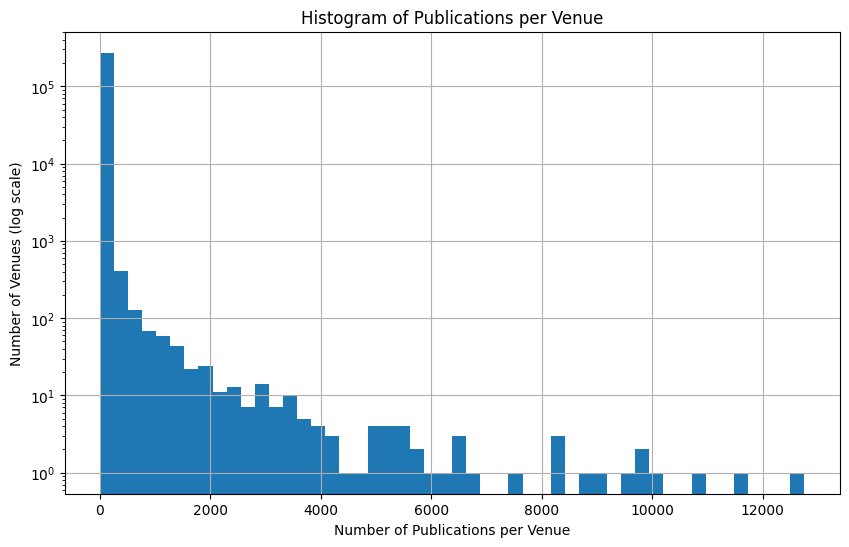

In [63]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(venue_counts, bins=50, log=True)
plt.xlabel('Number of Publications per Venue')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Publications per Venue')
plt.grid(True)
plt.show()

**F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?**

In [64]:
# Calculate the number of references per publication
df['num_references'] = df['references'].apply(len)

# Find the publication with the largest number of references
publication_with_most_references = df.loc[df['num_references'].idxmax()]
print("Publication with the largest number of references:")
print(f"Title: {publication_with_most_references['title']}")
print(f"Number of References: {publication_with_most_references['num_references']}")

Publication with the largest number of references:
Title: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles
Number of References: 809


In [65]:
from itertools import chain
from collections import Counter

# Ensure references are lists
df['references'] = df['references'].apply(lambda x: x if isinstance(x, list) else [])

# Efficiently flatten all references
all_references = chain.from_iterable(df['references'])

# Count citations for each publication index
citation_counts = Counter(all_references)

# Ensure index column is string for consistency
df['index'] = df['index'].astype(str)

# Add citation counts to the DataFrame
df['num_citations'] = df['index'].apply(lambda x: citation_counts.get(x, 0))

# Find the publication with the largest number of citations
publication_with_most_citations = df.loc[df['num_citations'].idxmax()]
print("\nPublication with the largest number of citations:")
print(f"Title: {publication_with_most_citations['title']}")
print(f"Number of Citations: {publication_with_most_citations['num_citations']}")


Publication with the largest number of citations:
Title: INFORMS Journal on Computing
Number of Citations: 938039


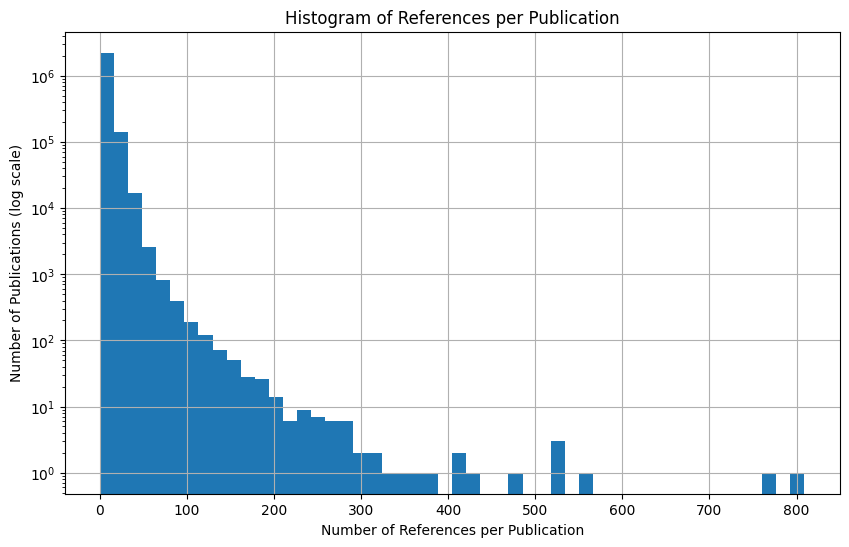

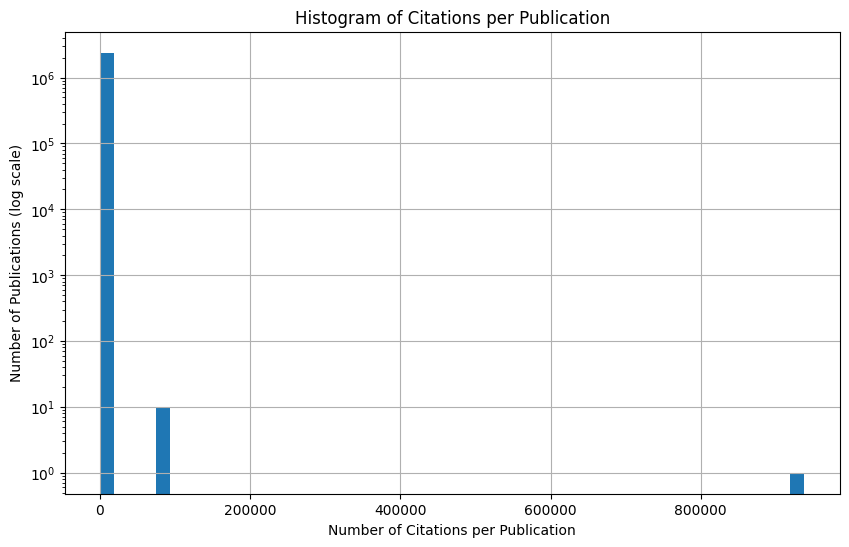

In [66]:
import matplotlib.pyplot as plt

# Plot histogram for number of references
plt.figure(figsize=(10, 6))
plt.hist(df['num_references'], bins=50, log=True)
plt.xlabel('Number of References per Publication')
plt.ylabel('Number of Publications (log scale)')
plt.title('Histogram of References per Publication')
plt.grid(True)
plt.show()

# Plot histogram for number of citations
plt.figure(figsize=(10, 6))
plt.hist(df['num_citations'], bins=50, log=True)
plt.xlabel('Number of Citations per Publication')
plt.ylabel('Number of Publications (log scale)')
plt.title('Histogram of Citations per Publication')
plt.grid(True)
plt.show()

Do these make sense?

Largest number of references is a believable number being at 809. However, 938k citations seems extreme for a publication.

**G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure citation counts are calculated
if 'num_citations' not in df.columns:
    raise ValueError("The DataFrame must include a 'num_citations' column.")

# Group publications by venue
venue_stats = df.groupby('venue').agg(
    total_citations=pd.NamedAgg(column='num_citations', aggfunc='sum'),
    num_publications=pd.NamedAgg(column='index', aggfunc='count')
).reset_index()

# Calculate the impact factor for each venue
venue_stats['impact_factor'] = venue_stats['total_citations'] / venue_stats['num_publications']

# Print top venues by impact factor
print("Top venues by impact factor:")
print(venue_stats.sort_values(by='impact_factor', ascending=False).head(10))

Top venues by impact factor:
                                                    venue  total_citations  \
16127                                             AI EDAM            82080   
108244                                               Graz            82080   
180842                                              PVLDB            82080   
108086                            Graphics Interface 1990            82080   
118727  IJIRR: International Journal of Information Re...            82080   
61629   Computers and Intractability: A Guide to the T...             8620   
105770  Genetic Algorithms in Search, Optimization and...             6526   
249123          The nature of statistical learning theory             5297   
45722                 C4.5: programs for machine learning             4882   
74935   Design patterns: elements of reusable object-o...             4717   

        num_publications  impact_factor  
16127                  1        82080.0  
108244                 1    

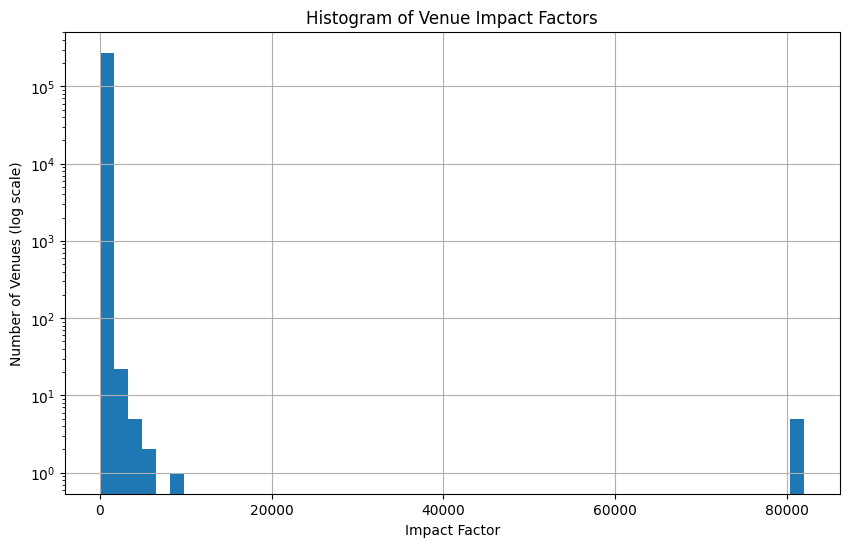

In [68]:
# Plot histogram of impact factors
plt.figure(figsize=(10, 6))
plt.hist(venue_stats['impact_factor'], bins=50, log=True)
plt.xlabel('Impact Factor')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Venue Impact Factors')
plt.grid(True)
plt.show()

**H. What is the venue with the highest apparent impact factor? Do you believe this number?**

In [69]:
# Find the venue with the highest impact factor
highest_impact_venue = venue_stats.loc[venue_stats['impact_factor'].idxmax()]

# Print the venue details
print("Venue with the highest apparent impact factor:")
print(f"Venue: {highest_impact_venue['venue']}")
print(f"Total Citations: {highest_impact_venue['total_citations']}")
print(f"Number of Publications: {highest_impact_venue['num_publications']}")
print(f"Impact Factor: {highest_impact_venue['impact_factor']}")

Venue with the highest apparent impact factor:
Venue: AI EDAM
Total Citations: 82080
Number of Publications: 1
Impact Factor: 82080.0


Do you believe this number?

No. It appears that a single publication generated an impact factor of 82,080. This exceeds the provided link's impact factor "guide" by an extreme amount.

**I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?**

In [70]:
# Filter for venues with at least 10 publications
filtered_venue_stats = venue_stats[venue_stats['num_publications'] >= 10]

# Print the filtered statistics
print(f"Number of venues with at least 10 publications: {len(filtered_venue_stats)}")

Number of venues with at least 10 publications: 25641


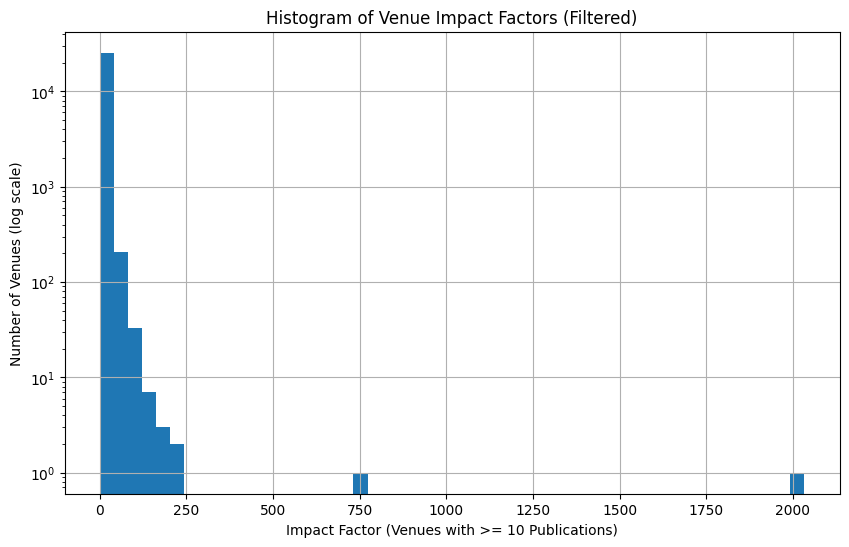

In [71]:
# Plot histogram of impact factors for venues with at least 10 publications
plt.figure(figsize=(10, 6))
plt.hist(filtered_venue_stats['impact_factor'], bins=50, log=True)
plt.xlabel('Impact Factor (Venues with >= 10 Publications)')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Venue Impact Factors (Filtered)')
plt.grid(True)
plt.show()

In [72]:
# Find the venue with the highest impact factor
highest_filtered_impact_venue = filtered_venue_stats.loc[filtered_venue_stats['impact_factor'].idxmax()]

# Print the venue details
print("\nVenue with the highest impact factor (Filtered):")
print(f"Venue: {highest_filtered_impact_venue['venue']}")
print(f"Total Citations: {highest_filtered_impact_venue['total_citations']}")
print(f"Number of Publications: {highest_filtered_impact_venue['num_publications']}")
print(f"Impact Factor: {highest_filtered_impact_venue['impact_factor']}")


Venue with the highest impact factor (Filtered):
Venue: Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining
Total Citations: 410707
Number of Publications: 202
Impact Factor: 2033.2029702970297


In [73]:
# Extract publications from the venue with the highest impact factor
top_venue_publications = df[df['venue'] == highest_filtered_impact_venue['venue']]

# List citation counts
print("\nCitation counts for publications in the top venue:")
print(top_venue_publications[['title', 'num_citations']])


Citation counts for publications in the top venue:
                                                     title  num_citations
1991774  Who, where, when and what: discover spatio-tem...              9
1991775  Multi-label classification by mining label and...              3
1991776  Fast structure learning in generalized stochas...              1
1991777  Accurate intelligible models with pairwise int...              0
1991778  Spotting opinion spammers using behavioral foo...              0
...                                                    ...            ...
2111179         Optimization in learning and data analysis          82080
2111180      The online revolution: education for everyone          82080
2112019     Predicting the present with search engine data          82080
2112020     Predicting the present with search engine data          82080
2112021     Predicting the present with search engine data          82080

[202 rows x 2 columns]


In [74]:
# Calculate mean and median number of citations for the top venue
mean_citations = top_venue_publications['num_citations'].mean()
median_citations = top_venue_publications['num_citations'].median()

print("\nComparison of Mean and Median Citations:")
print(f"Impact Factor (Mean Number of Citations): {mean_citations}")
print(f"Median Number of Citations: {median_citations}")


Comparison of Mean and Median Citations:
Impact Factor (Mean Number of Citations): 2033.2029702970297
Median Number of Citations: 1.0


How does the histogram change?
Limiting the graph to only include more than 10 publications significantly lowers our impact factor down to 2000. Instead of our previous 82080. I beleive this number is still incorrect, as we are looking for an impact factor in the range of 0-20. Looking at the graph shows us that there is still a small outlier which can possibly be removed to help shift the values down.

How does the impact factor compare to the median number of citations?
With an impact factor of 2033, and a median number of citations being at 1 , this suggest that there is still an outlier which is inflating the impact factor.


**J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.**

In [75]:
# Group publications by year and calculate the averages
yearly_stats = df.groupby('year').agg(
    avg_references=pd.NamedAgg(column='num_references', aggfunc='mean'),
    avg_citations=pd.NamedAgg(column='num_citations', aggfunc='mean')
).reset_index()

# Drop rows with missing or invalid years
yearly_stats = yearly_stats.dropna(subset=['year']).sort_values(by='year')

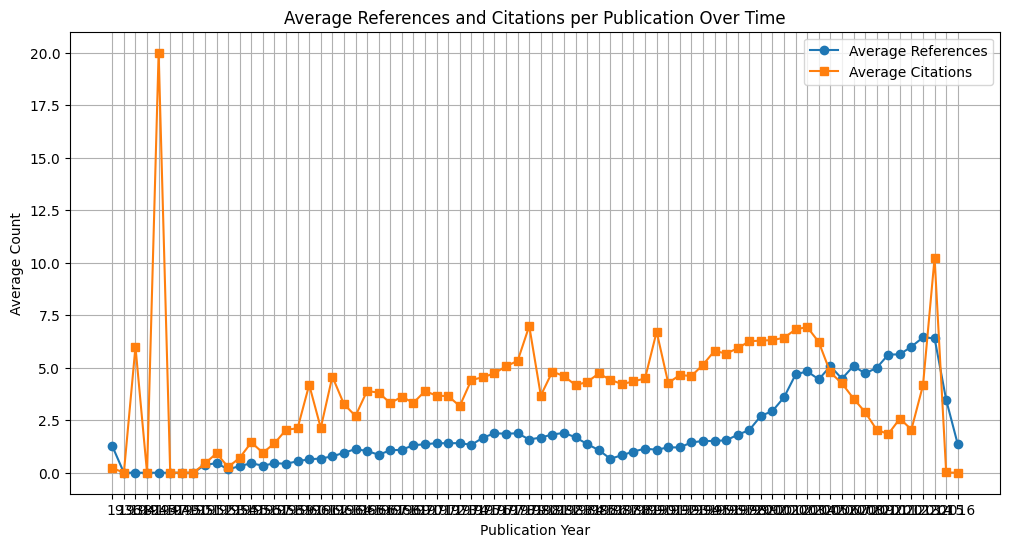

In [76]:
import matplotlib.pyplot as plt

# Plot average number of references over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['year'], yearly_stats['avg_references'], label='Average References', marker='o')
plt.plot(yearly_stats['year'], yearly_stats['avg_citations'], label='Average Citations', marker='s')
plt.xlabel('Publication Year')
plt.ylabel('Average Count')
plt.title('Average References and Citations per Publication Over Time')
plt.legend()
plt.grid(True)
plt.show()

Explain the differences you see in the trends:

In the early years, towards the left of the chart, we see that there is a lot of fluctuation happening in citations. This is likely due to a small sample size of publications. Possibly where some highly cited works are dominating the statistic. Also, the average number of references is low, once again pointing towards a limited number of literature available to site in the early period.

Gradually the average number of references per publication increases as time goes on. Showing the growing collection of academic work, allowing researcher to use more citations.

**Problem 2 : Kosarak Association Rules**

Your task is to take a dataset of nearly one million clicks on a news site16 and use the Weka Explorer to identify interesting association rules. Ordinarily this would be a point-and-click task; however, the input data format is a list of transactions (each line in the file includes a list of anonymized news item id’s), whereas Weka requires a tabular format. Specifically, each distinct news item id should be represented via a column/attribute, and each row/instance should be a sequence of binary values, indicating whether or not the user visited the corresponding news item.

**A. Write a Python program which takes as its argument5 the path to a text file of data (assumed to be in the itemset format above) and produces as output to the console a sparse ARFF file.**

In [77]:
!wget -O /content/kosarak.dat 'http://fimi.uantwerpen.be/data/kosarak.dat'

--2025-01-20 22:45:04--  http://fimi.uantwerpen.be/data/kosarak.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32029467 (31M)
Saving to: ‘/content/kosarak.dat’

/content/kosarak.da 100%[===================>]  30.54M  15.5MB/s    in 2.0s    

2025-01-20 22:45:06 (15.5 MB/s) - ‘/content/kosarak.dat’ saved [32029467/32029467]



In [78]:
!head /content/kosarak.dat

1 2 3
1
4 5 6 7
1 8
9 10
11 6 12 13 14 15 16
1 3 7
17 18
11 6 19 20 21 22 23 24
1 25 3


**B. Use your program to convert the kosarak.dat file to a sparse kosarak.arff. About how long did it take to run?**

In [79]:
import time

def generate_sparse_arff(input_file_path, output_file_path="output.arff"):
    start_time = time.time()

    # Step 1: Parse transactions and unique items
    transactions = []
    unique_items = set()

    print("Reading input file...")
    with open(input_file_path, 'r') as file:
        for line in file:
            items = line.strip().split()
            transactions.append(items)
            unique_items.update(items)

    # Step 2: Sort items numerically for correct attribute order
    sorted_items = sorted(unique_items, key=lambda x: int(x))
    item_to_index = {item: idx for idx, item in enumerate(sorted_items)}
    print(f"Found {len(sorted_items)} unique items.")

    # Step 3: Write the ARFF file
    print("Generating ARFF file...")
    with open(output_file_path, 'w') as arff_file:
        # Write ARFF header
        arff_file.write("% Sparse ARFF file generated from itemset data\n")
        arff_file.write("@RELATION news_clicks\n\n")

        for item in sorted_items:
            arff_file.write(f"@ATTRIBUTE item_{item} {{0,1}}\n")

        arff_file.write("\n@DATA\n")

        # Write transactions as sparse rows
        for row_num, transaction in enumerate(transactions):
            # Remove duplicate items and get sorted indices
            unique_items_in_transaction = set(transaction)
            active_indices = sorted([item_to_index[item] for item in unique_items_in_transaction if item in item_to_index])

            # Write the sparse row
            if active_indices:
                sparse_row = "{" + ",".join(f"{idx} 1" for idx in active_indices) + "}"
                arff_file.write(sparse_row + "\n")

    elapsed_time = time.time() - start_time
    print(f"ARFF file successfully created: {output_file_path}")
    print(f"Time taken: {elapsed_time:.2f} seconds")

input_file_path = "/content/kosarak.dat"  # Path to input file
output_file_path = "/content/kosarak_fixed.arff"  # Path to output file
generate_sparse_arff(input_file_path, output_file_path)

Reading input file...
Found 41270 unique items.
Generating ARFF file...
ARFF file successfully created: /content/kosarak_fixed.arff
Time taken: 5.98 seconds


In [80]:
from google.colab import files
files.download('/content/kosarak_fixed.arff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**C. Load the resulting file into Weka (as described above; you should have 41,270 attributes and 990, 002 instances). About how long did it take to load this file?**

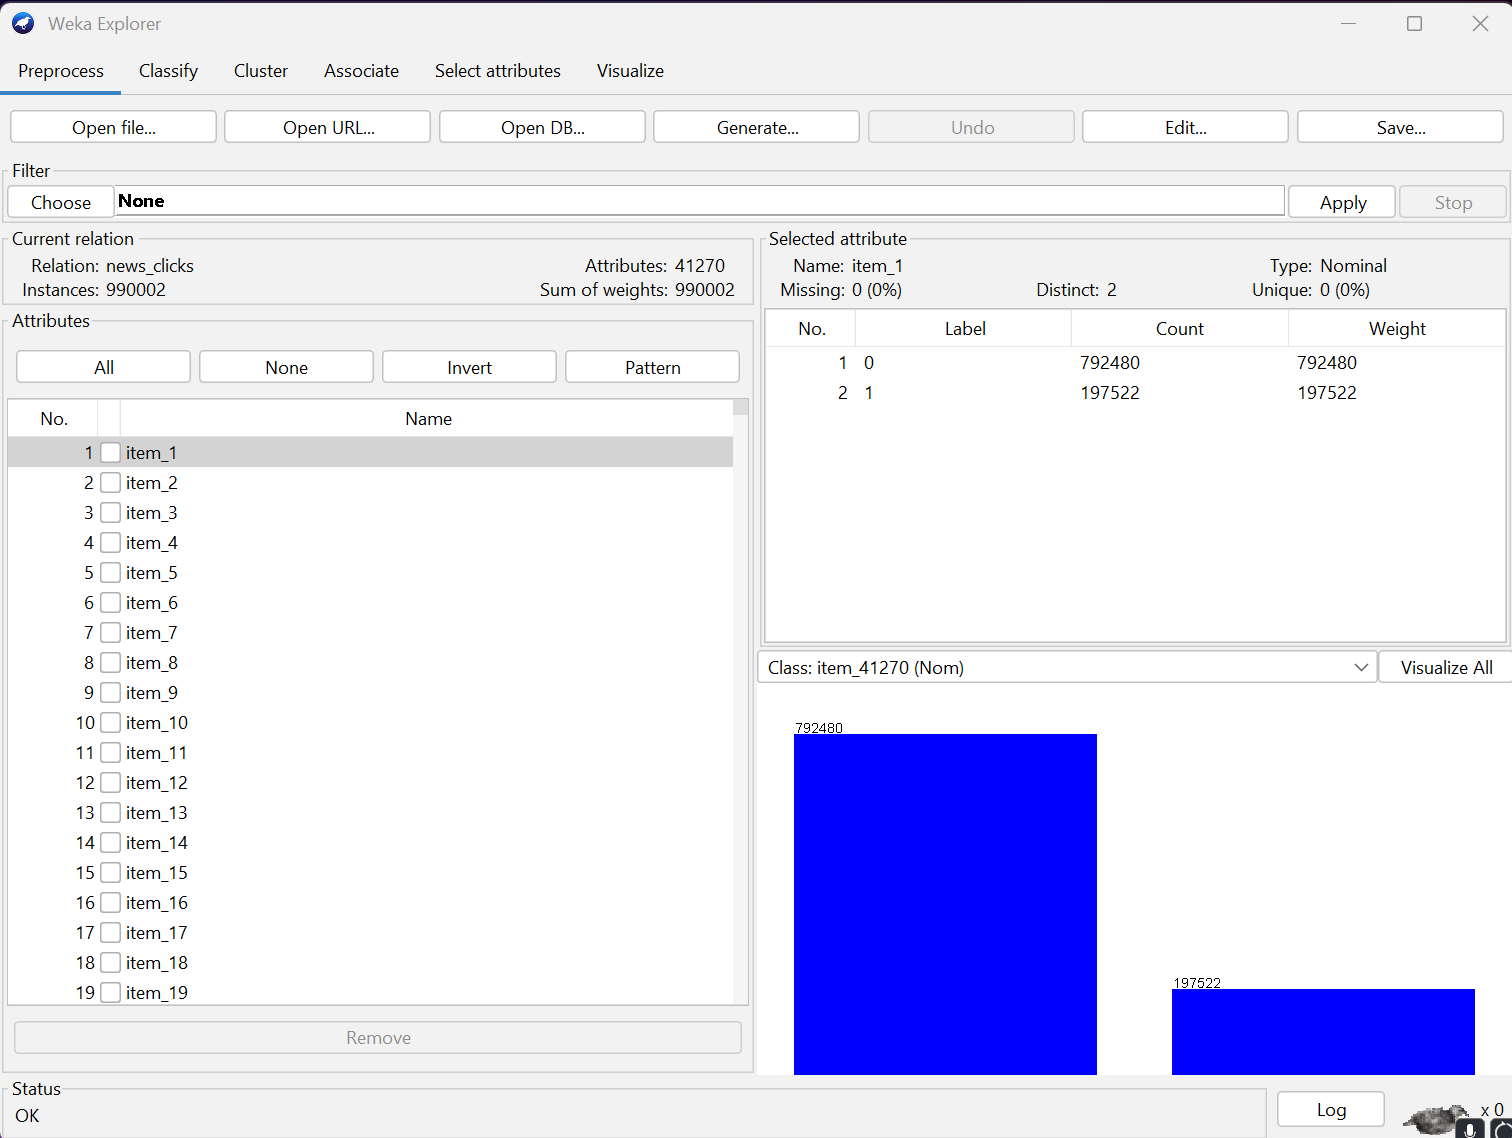

Loading our data in Weka. As can be seen we have 41,270 attributes and 990,002 instances. It took approximately 5 seconds to load in.

**D. Use Weka’s FP-Growth implementation to find rules that have support count of at least 49, 500 and confidence of at least 99% – record your rules (there should be 2).**

Below are the settings used to run FPGrowth. The relative support can be calculated by taking our support count and dividing it by the total transactions, which gives us 49,500/990,002 which is approx 0.05. We are expecting 2 rules which is given, and we are expcting a min confidence of 99%.

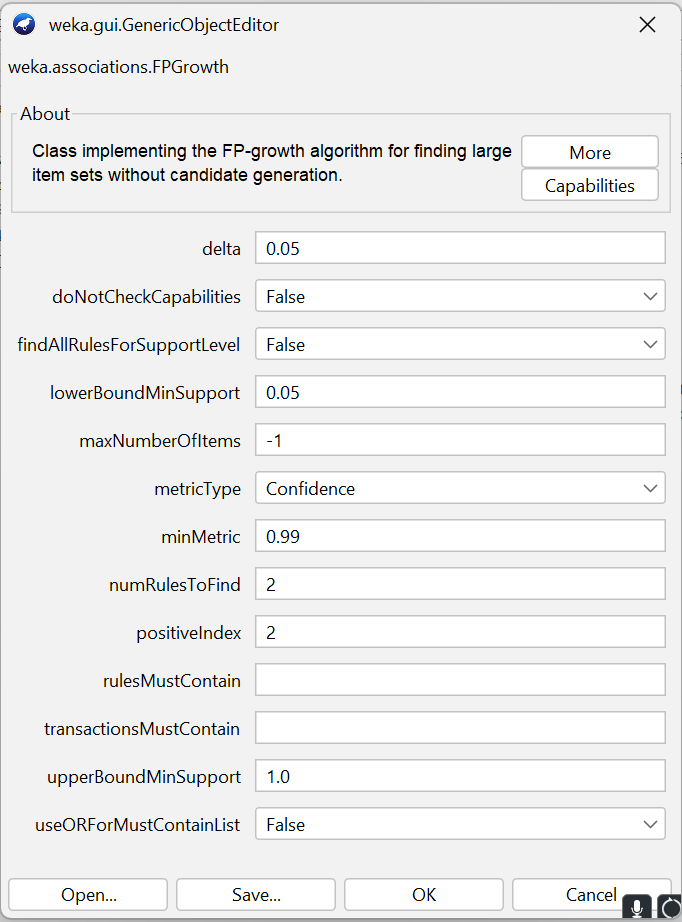

Shown below are the rules found from the first run while using the above settings.

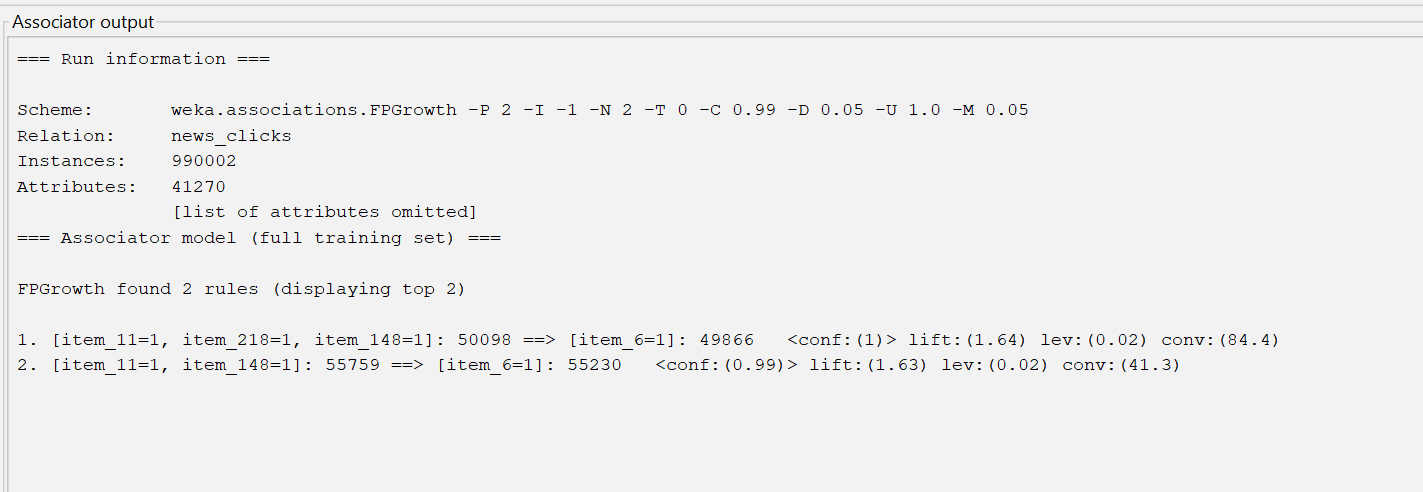

**E. Run the algorithm at least 5 times. Then look to the log and record how much time each took. How does the average time compare to the time necessary to convert the dataset and then load into Weka?**

Taking a look at the Weka log, it appears that each run takes around 1 to 2 seconds to complete a run. Comparing this to the time necessary to convert the dataset and load into Weka is a significant time difference. The loading and conversion process takes around 14 seconds.

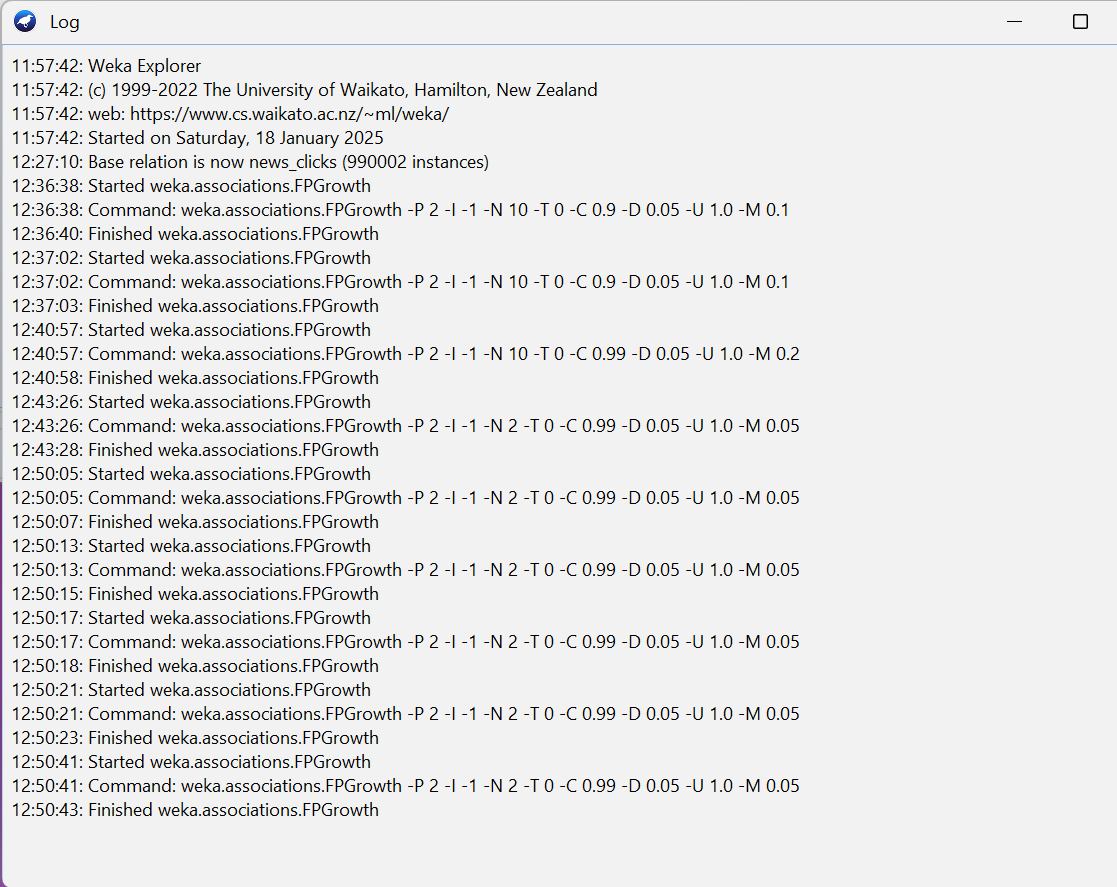

**PROBLEM 3 MNIST, 20 NG Preprocessing**

**Your goal in this problem is to *parse*, *normalize*, and otherwise *prepare* two common data sets (MNIST + 20NG) for classification. In this problem, that includes prepping the datasets for [dis]similarity computations.
Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.**

In [81]:
!wget -O /content/20news-bydate.tar.gz 'http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz'

--2025-01-20 22:45:12--  http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz
Resolving qwone.com (qwone.com)... 173.48.205.131
Connecting to qwone.com (qwone.com)|173.48.205.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14464277 (14M) [application/x-gzip]
Saving to: ‘/content/20news-bydate.tar.gz’

/content/20news-byd 100%[===================>]  13.79M  6.98MB/s    in 2.0s    

2025-01-20 22:45:15 (6.98 MB/s) - ‘/content/20news-bydate.tar.gz’ saved [14464277/14464277]



20 NG loading below.

In [82]:
# Download the 20 Newsgroups dataset
!wget -O /content/20news-bydate.tar.gz 'http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz'

# Extract the dataset
import tarfile
import os

data_dir = '/content/20news-bydate'
with tarfile.open('/content/20news-bydate.tar.gz', 'r:gz') as tar:
    tar.extractall(path=data_dir)

print(f"Dataset extracted to {data_dir}")

--2025-01-20 22:45:15--  http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz
Resolving qwone.com (qwone.com)... 173.48.205.131
Connecting to qwone.com (qwone.com)|173.48.205.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14464277 (14M) [application/x-gzip]
Saving to: ‘/content/20news-bydate.tar.gz’

/content/20news-byd 100%[===================>]  13.79M  9.62MB/s    in 1.4s    

2025-01-20 22:45:16 (9.62 MB/s) - ‘/content/20news-bydate.tar.gz’ saved [14464277/14464277]

Dataset extracted to /content/20news-bydate


In [83]:
# Parse the dataset
import os
import tarfile
from sklearn.feature_extraction.text import TfidfVectorizer

data_dir = '/content/20news-bydate'

# Check if the directory exists, if not, download and extract
train_dir = os.path.join(data_dir, '20news-bydate-train')
if not os.path.exists(train_dir):
    print("Downloading 20 Newsgroups dataset...")
    !wget -O /content/20news-bydate.tar.gz 'http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz'

    print("Extracting dataset...")
    with tarfile.open('/content/20news-bydate.tar.gz', 'r:gz') as tar:
        tar.extractall(path=data_dir)

    print(f"Dataset extracted to {data_dir}")
def parse_20newsgroups(data_dir):
    texts, labels = [], []
    label_names = sorted(os.listdir(data_dir))

    for label_idx, label_name in enumerate(label_names):
        label_path = os.path.join(data_dir, label_name)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                with open(file_path, 'r', errors='ignore') as f:
                    texts.append(f.read())
                    labels.append(label_idx)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(texts).toarray()

    return X, labels, vectorizer.get_feature_names_out()

# Process the dataset
X_20NG, y_20NG, feature_names_20NG = parse_20newsgroups(os.path.join(data_dir, '20news-bydate-train'))
print(f"20NG Dataset: {len(X_20NG)} samples, {len(feature_names_20NG)} features.")

20NG Dataset: 11314 samples, 5000 features.


MNIST loading below.

In [84]:
import os

base_url = 'https://web.archive.org/web/20220331230320/http://yann.lecun.com/exdb/mnist/'
files = [
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz'
]

# Directory to store MNIST data
os.makedirs('/content/mnist', exist_ok=True)

# Download each file
for file in files:
    url = f"{base_url}{file}"
    output_path = f"/content/mnist/{file}"
    !wget -O {output_path} {url}

print("All MNIST files downloaded.")

--2025-01-20 22:45:22--  https://web.archive.org/web/20220331230320/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving web.archive.org (web.archive.org)... 207.241.237.3
Connecting to web.archive.org (web.archive.org)|207.241.237.3|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://web.archive.org/web/20220331225332/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz [following]
--2025-01-20 22:45:25--  https://web.archive.org/web/20220331225332/http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Reusing existing connection to web.archive.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘/content/mnist/train-images-idx3-ubyte.gz’

/content/mnist/trai 100%[===================>]   9.45M  20.1MB/s    in 0.5s    

2025-01-20 22:45:26 (20.1 MB/s) - ‘/content/mnist/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-01-20 22:45:26--  https://web.archive

In [85]:
import gzip
import numpy as np

# Function to extract gzip files
def extract_gz(file_path, out_path):
    with gzip.open(file_path, 'rb') as f_in:
        with open(out_path, 'wb') as f_out:
            f_out.write(f_in.read())

# Extract MNIST files
mnist_dir = '/content/mnist'
for file in files:
    gz_path = os.path.join(mnist_dir, file)
    out_path = gz_path.replace('.gz', '')
    extract_gz(gz_path, out_path)

print("All MNIST files extracted.")

# Function to parse MNIST image files
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        f.read(16)  # Skip header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28)

# Function to parse MNIST label files
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        f.read(8)  # Skip header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data

# Load training and test data
X_train_mnist = load_mnist_images('/content/mnist/train-images-idx3-ubyte')
y_train_mnist = load_mnist_labels('/content/mnist/train-labels-idx1-ubyte')
X_test_mnist = load_mnist_images('/content/mnist/t10k-images-idx3-ubyte')
y_test_mnist = load_mnist_labels('/content/mnist/t10k-labels-idx1-ubyte')

print("MNIST data successfully loaded.")

All MNIST files extracted.
MNIST data successfully loaded.


**Your second task is normalization. The type of normalization used depends on the task and dataset. Common types of normalization include:**

**Shift-and-scale normalization: subtract the minimum, then divide by new maximum. Now all values are between 0-1**

**Zero mean, unit variance : subtract the mean, divide by the appropriate value to get variance=1**

**Term-Frequency (TF) weighting : map each term in a document with its frequency (text only; see the wiki page) It is up to you to determine the appropriate normalization.**

In [86]:
# Shift-and-Scale Normalization: Normalize pixel values to [0, 1] for MNIST
X_train_scaled = (X_train_mnist - X_train_mnist.min()) / (X_train_mnist.max() - X_train_mnist.min())
X_test_scaled = (X_test_mnist - X_test_mnist.min()) / (X_test_mnist.max() - X_test_mnist.min())

print("Shift-and-Scale Normalization Complete.")

Shift-and-Scale Normalization Complete.


In [87]:
# Zero Mean, Unit Variance Normalization for MNIST
mean_pixel = X_train_scaled.mean(axis=(0, 1, 2))
std_pixel = X_train_scaled.std(axis=(0, 1, 2))

X_train_norm = (X_train_scaled - mean_pixel) / std_pixel
X_test_norm = (X_test_scaled - mean_pixel) / std_pixel

print("Zero Mean, Unit Variance Normalization Complete.")

Zero Mean, Unit Variance Normalization Complete.


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 20 Newsgroups data
corpus = [
    "This is a sample document.",
    "This document is another sample document.",
    "And here is a different document entirely."
]

# TF Normalization
vectorizer = TfidfVectorizer(stop_words='english', use_idf=False, norm=None)
X_tf = vectorizer.fit_transform(corpus)

print("Term-Frequency Normalization Complete.")
print("TF Matrix Shape:", X_tf.shape)

Term-Frequency Normalization Complete.
TF Matrix Shape: (3, 4)


**Your final task is to compute several types of pairwise similarities, for use in the next question. You are encouraged to write your own implementation of the pairwise similarity/distance matrix computation---but unless explicitly specified we will accept any code using a common library available in Matlab/Java/Python/R.**

**Distance/similarity options to implement:**

**euclidian distance (required, library)**

**euclidian distance (required, your own - use batches if you run into memory issues)**

**edit distance (required for text) -or- cosine similarity (required for vectors)**

**jaccard similarity (optional)**

**Manhattan distance (optional)**

In [89]:
from sklearn.metrics.pairwise import euclidean_distances

# Compute Euclidean Distance for a batch
batch_train = X_train_norm[:100].reshape(100, -1)  # Flatten images
dist_matrix_euclidean = euclidean_distances(batch_train)

print("Euclidean Distance (Library) Computation Complete.")

Euclidean Distance (Library) Computation Complete.


In [98]:
import numpy as np

def custom_euclidean_distance(A, B):
    """
    Compute the Euclidean distance between two arrays, A and B.
    If A is a matrix (m x n) and B is a matrix (k x n), it computes
    the pairwise distances (m x k).

    Parameters:
    A: numpy array of shape (m, n) or (n,)
    B: numpy array of shape (k, n) or (n,)

    Returns:
    distances: numpy array of shape (m, k) or (k,) if A is a vector.
    """
    A = np.atleast_2d(A)  # Ensure A is at least 2D
    B = np.atleast_2d(B)  # Ensure B is at least 2D
    return np.sqrt(np.sum((A[:, np.newaxis, :] - B) ** 2, axis=2))

# Example computation for matrices
A = X_train_norm[:10].reshape(10, -1)
B = X_train_norm[10:20].reshape(10, -1)
distances_custom = custom_euclidean_distance(A, B)

print("Euclidean Distance (Custom) Computation Complete.")

Euclidean Distance (Custom) Computation Complete.


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute Cosine Similarity for MNIST (flattened)
cosine_sim = cosine_similarity(batch_train)

print("Cosine Similarity Computation Complete.")

Cosine Similarity Computation Complete.


In [92]:
# Jaccard Similarity for Binarized Data
def jaccard_similarity(A, B):
    intersection = np.logical_and(A, B).sum()
    union = np.logical_or(A, B).sum()
    return intersection / union

# Example on MNIST (binarized images)
A = (X_train_norm[:10] > 0.5).reshape(10, -1)
B = (X_train_norm[10:20] > 0.5).reshape(10, -1)

jac_sim = np.array([jaccard_similarity(a, b) for a in A for b in B])
jac_sim_matrix = jac_sim.reshape(len(A), len(B))

print("Jaccard Similarity Computation Complete.")

Jaccard Similarity Computation Complete.


**PROBLEM 4: MNIST, 20 NG : Train and test KNN classification (supervised)**

Your goal in this problem is to write your own K-nearest neighbor (KNN) classifier.

For each of the two datasets, now in matrix format and with pairwise similarity computed, train and test a KNN classifier. You are required to implement KNN classification model yourself, though you may use support libraries / data-structures for the neighbor searching.

You should partition the datasets into (say) an 80/10/10 training/testing/validation sets. Note that the actual "training" here consists of simply identifying nearest neighbors---unlike other common classifiers, there is no iterative or gradient-based procedure.

Report both training performance and testing performance. If using Python, you are encouraged (but not required) to write a scikit-learn compatible *estimator* class supporting a common API interface, e.g. *.fit(), *.predict(), *.transform(), etc. See https://scikit-learn.org/stable/developers/develop.html for more details.

In [93]:
from sklearn.model_selection import train_test_split

# Partition MNIST data (80% training, 10% validation, 10% testing)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_norm, y_train_mnist, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 10%

print("MNIST Partitioning Complete.")
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

MNIST Partitioning Complete.
Training Set: (42000, 28, 28), Validation Set: (6000, 28, 28), Test Set: (12000, 28, 28)


In [94]:
# Split the dataset into training, validation, and testing sets
X_train_full_20NG, X_test_20NG, y_train_full_20NG, y_test_20NG = train_test_split(
    X_20NG, y_20NG, test_size=0.2, random_state=42
)
X_train_20NG, X_val_20NG, y_train_20NG, y_val_20NG = train_test_split(
    X_train_full_20NG, y_train_full_20NG, test_size=0.125, random_state=42  # 0.125 * 0.8 = 10%
)

print("Partitioning Complete:")
print(f"Training Set: {X_train_20NG.shape}, Validation Set: {X_val_20NG.shape}, Test Set: {X_test_20NG.shape}")

Partitioning Complete:
Training Set: (7919, 5000), Validation Set: (1132, 5000), Test Set: (2263, 5000)


In [95]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

class KNNClassifier:
    def __init__(self, k=3, metric='euclidean', batch_size=100):
        """
        K-Nearest Neighbors classifier.

        Parameters:
        - k: Number of neighbors to consider.
        - metric: Distance metric ('euclidean' or 'cosine').
        - batch_size: Number of test samples to process in a batch.
        """
        self.k = k
        self.metric = metric
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size  # Batch support

    def fit(self, X_train, y_train):
        """
        Store the training data and labels.

        Parameters:
        - X_train: Training data, shape (n_samples, n_features).
        - y_train: Training labels, shape (n_samples,).
        """
        self.X_train = X_train
        self.y_train = np.array(y_train)

    def _compute_distances(self, X_test_batch):
        """
        Compute distances between a batch of test samples and all training samples.

        Parameters:
        - X_test_batch: Test samples (batch), shape (batch_size, n_features).

        Returns:
        - distances: Distance matrix, shape (batch_size, n_train_samples).
        """
        if self.metric == 'euclidean':
            return cdist(X_test_batch, self.X_train, metric='euclidean')
        elif self.metric == 'cosine':
            return 1 - cosine_similarity(X_test_batch, self.X_train)
        else:
            raise ValueError("Unsupported metric! Use 'euclidean' or 'cosine'.")

    def predict(self, X_test):
        """
        Predict the labels for all test samples.

        Parameters:
        - X_test: Test data, shape (n_samples, n_features).

        Returns:
        - predictions: Predicted labels, shape (n_samples,).
        """
        predictions = []
        n_samples = X_test.shape[0]

        # Process test samples in batches
        for i in range(0, n_samples, self.batch_size):
            batch = X_test[i:i + self.batch_size]
            distances = self._compute_distances(batch)
            nearest_indices = np.argsort(distances, axis=1)[:, :self.k]  # Find k nearest neighbors
            nearest_labels = self.y_train[nearest_indices]  # Labels of nearest neighbors
            batch_predictions = [np.bincount(labels).argmax() for labels in nearest_labels]
            predictions.extend(batch_predictions)

        return np.array(predictions)

    def score(self, X_test, y_test):
        """
        Compute the accuracy of the classifier.

        Parameters:
        - X_test: Test data, shape (n_samples, n_features).
        - y_test: True labels, shape (n_samples,).

        Returns:
        - accuracy: Accuracy score as a float.
        """
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

In [96]:
# Initialize and train the KNN Classifier for 20 Newsgroups
knn_20ng = KNNClassifier(k=5, metric='cosine', batch_size=500)
knn_20ng.fit(X_train_20NG, y_train_20NG)

# Predict and evaluate on training, validation, and test sets
y_train_pred_20NG = knn_20ng.predict(X_train_20NG)
train_accuracy_20NG = knn_20ng.score(X_train_20NG, y_train_20NG)

y_val_pred_20NG = knn_20ng.predict(X_val_20NG)
val_accuracy_20NG = knn_20ng.score(X_val_20NG, y_val_20NG)

y_test_pred_20NG = knn_20ng.predict(X_test_20NG)
test_accuracy_20NG = knn_20ng.score(X_test_20NG, y_test_20NG)

print(f"20 Newsgroups KNN Performance:")
print(f"Training Accuracy: {train_accuracy_20NG:.4f}")
print(f"Validation Accuracy: {val_accuracy_20NG:.4f}")
print(f"Test Accuracy: {test_accuracy_20NG:.4f}")

20 Newsgroups KNN Performance:
Training Accuracy: 0.8313
Validation Accuracy: 0.7288
Test Accuracy: 0.7163


In [97]:
# Flatten MNIST data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Limit the training set size for memory efficiency
X_train_sample_mnist = X_train_flat[:10000]
y_train_sample_mnist = y_train[:10000]

# Initialize and train the KNN Classifier for MNIST
knn_mnist = KNNClassifier(k=5, metric='euclidean', batch_size=500)
knn_mnist.fit(X_train_sample_mnist, y_train_sample_mnist)

# Predict and evaluate on training, validation, and test sets
y_train_pred_mnist = knn_mnist.predict(X_train_sample_mnist)
train_accuracy_mnist = knn_mnist.score(X_train_sample_mnist, y_train_sample_mnist)

y_val_pred_mnist = knn_mnist.predict(X_val_flat)
val_accuracy_mnist = knn_mnist.score(X_val_flat, y_val)

y_test_pred_mnist = knn_mnist.predict(X_test_flat)
test_accuracy_mnist = knn_mnist.score(X_test_flat, y_test)

print(f"MNIST KNN Performance:")
print(f"Training Accuracy: {train_accuracy_mnist:.4f}")
print(f"Validation Accuracy: {val_accuracy_mnist:.4f}")
print(f"Test Accuracy: {test_accuracy_mnist:.4f}")

MNIST KNN Performance:
Training Accuracy: 0.9667
Validation Accuracy: 0.9498
Test Accuracy: 0.9491
